In [1]:
import sys

# Conda enviroment paths
sys.path.append('/home/vicente/anaconda3/envs/freecad-env/lib')
sys.path.append('/home/vicente/anaconda3/envs/freecad-env/Mod/Fem')

import ObjectsFem
import FreeCAD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from mpl_toolkits.mplot3d.art3d import Poly3DCollection

In [2]:
doc_name = 'hex_3000'

timeEnd = 18_000
timeStep = 3_600

timeArray = np.arange(timeStep, timeEnd+timeStep, timeStep, dtype=int)

doc = FreeCAD.open(f'files/{doc_name}/{doc_name}_therm.FCStd')

results_list = [doc.getObject(f'CCX_Time_{time}_0_Results') for time in timeArray]
mesh_obj = doc.getObject('MeshGmsh')
model_obj = doc.getObject('Container')

In [37]:
max_temp = np.max([results.Temperature for results in results_list])
min_temp = np.min([results.Temperature for results in results_list])

print(f'Max Temperature: {max_temp} [K]')
print(f'Min Temperature: {min_temp} [K]')

cmap = plt.get_cmap('jet')
norm = mcolors.Normalize(vmin=min_temp, vmax=max_temp)

Max Temperature: 617.307 [K]
Min Temperature: 300.15 [K]


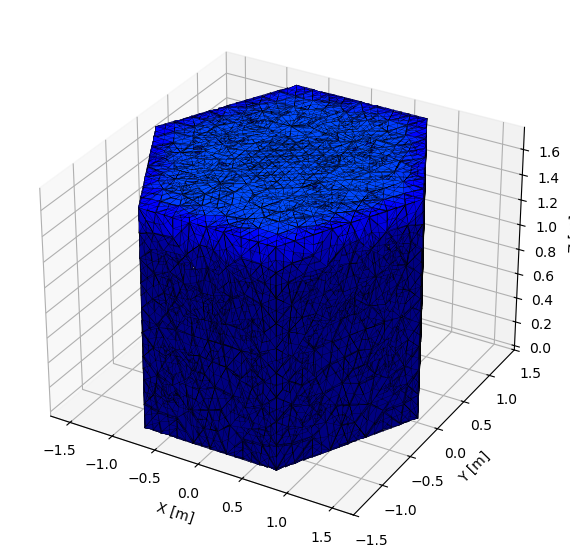

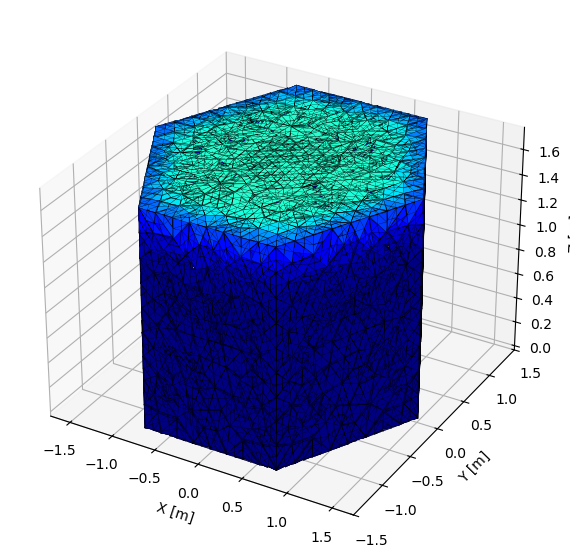

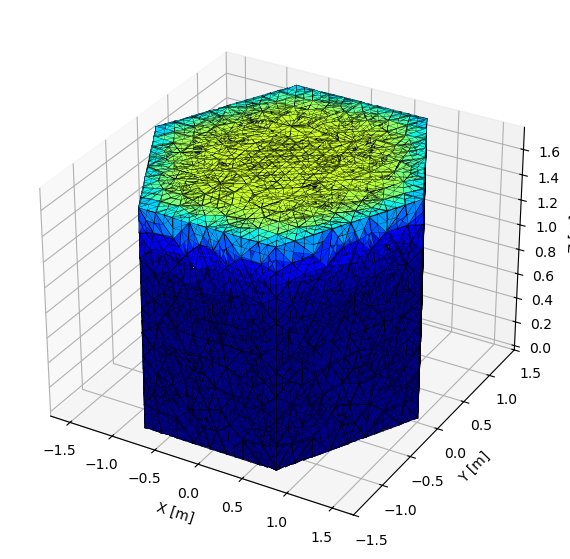

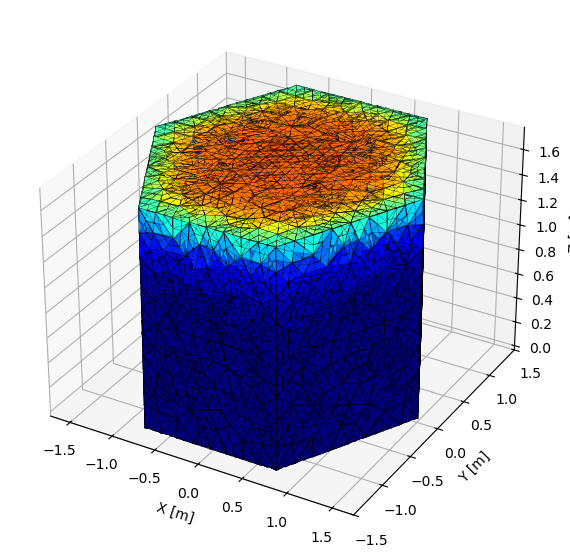

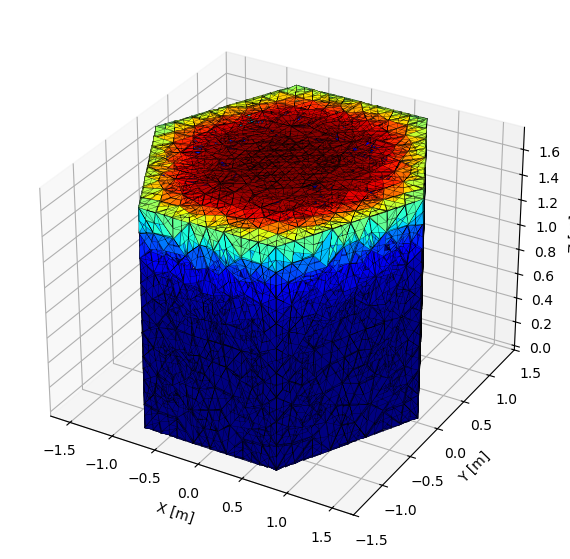

In [40]:
for results in results_list:
    nodes_dict = dict(mesh_obj.FemMesh.Nodes)
    elements = [mesh_obj.FemMesh.getElementNodes(v) for v in mesh_obj.FemMesh.Volumes]
    
    faces = []
    temperatures = []
    for element in elements:
        face = [nodes_dict[i] for i in element]
        faces.append(face)
        mean = np.mean([results.Temperature[i-1] for i in element])
        temperatures.append(mean)
    
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    
    poly3d = Poly3DCollection(1e-3*np.array(faces), facecolors=cmap(norm(temperatures)), linewidths=0.2, edgecolors='k')
    
    ax.add_collection3d(poly3d)
    
    ax.set_xlabel('X [m]')
    ax.set_ylabel('Y [m]')
    ax.set_zlabel('Z [m]')
    
    plt.show()